# Linear Regression
## Question 1
Make a class called LinearRegression which provides two functions : fit and predict. Try to implement it from scratch. If stuck, refer to the examples folder.

In [6]:


import numpy as np #Importing numpy which is used for matrix multiplication and numerical calculations

class LinearRegression: #Linear regression model
    def __init__(self, learning_rate=0.01, epochs=1000): #Defining learning rate and epochs
        self.learning_rate = learning_rate #Storing  learning rate and epochs to use later
        self.epochs = epochs
        self.coefficient = None #Initially set to none
        self.intercept = None
        self.loss_history = [] #Computing error after each epoch

    def fit(self, X, y): #Function to train the model
        n_samples, n_features = X.shape #Defining number of data points and number of features
        # Initialize parameters
        self.coefficient = np.zeros(n_features) #Setting slopes to zeros initially
        self.intercept = 0 #Setting intercept as 0

        for epoch in range(self.epochs): #Running for loop for learning

            y_pred = X @ self.coefficient + self.intercept #computing predicted outputs

            # Computing error
            error = y_pred - y

            # Computing gradients to know how much each slope and intercept should change to reduce error
            grad_m = (2/n_samples) * (X.T @ error)
            grad_b = (2/n_samples) * np.sum(error)

            # Updating slopes and intercept
            self.coefficient -= self.learning_rate * grad_m
            self.intercept -= self.learning_rate * grad_b

            # Compute MSE for history
            mse = np.mean(error**2)
            self.loss_history.append(mse)

        print(f"Training finished. Final MSE: {self.loss_history[-1]:.4f}") #Printing final MSE

    def predict(self, X):
        return X @ self.coefficient + self.intercept   #Computing final output after training


## Question 2

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).
1. Read it using pandas.
2. Check for **null values**.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. **Normalize** the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the model created in question 1 and predict the testing data.
8. Use **mean square error and R<sup>2</sup>** from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R<sup>2</sup>.
10. Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.

Note : (*) To solve this question, you may proceed in any of the following ways :
1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. [Refer here](https://www.kaggle.com/general/74235). For this, you need to create kaggle API token. Before submitting, hide or remove the API token.


   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

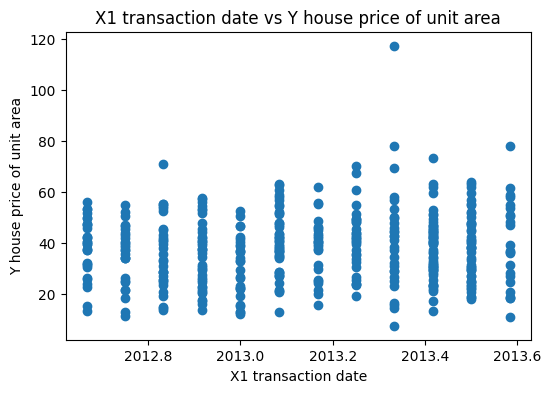

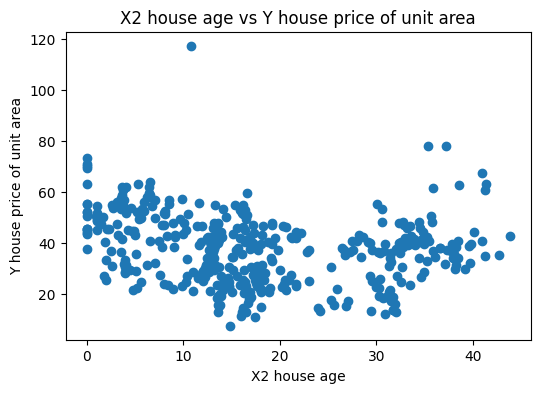

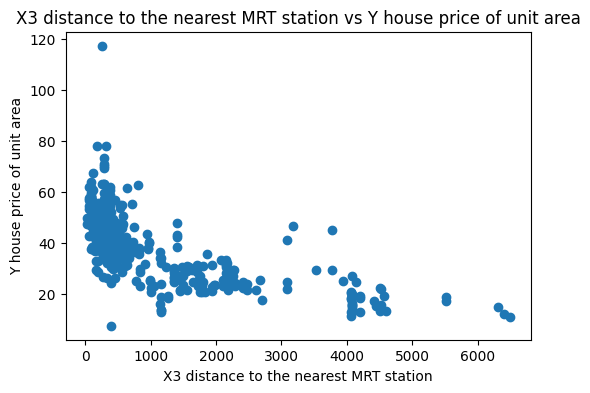

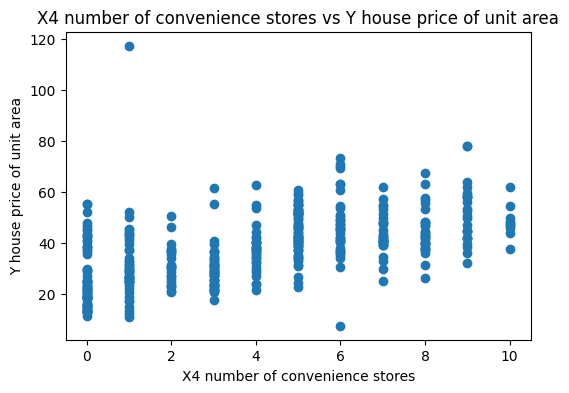

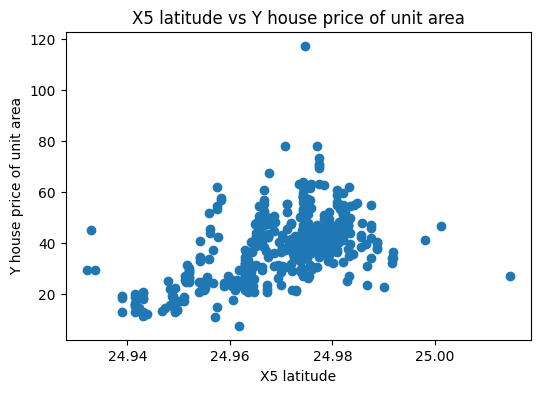

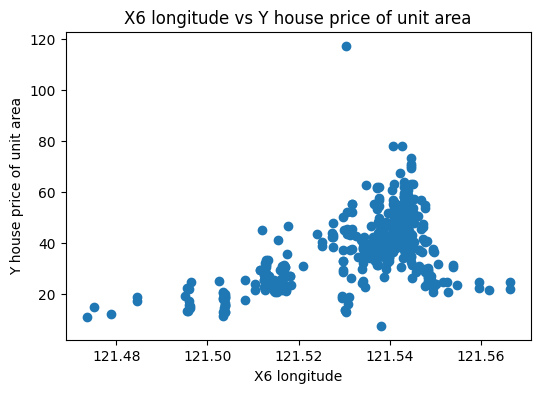

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')
Training finished. Final MSE: 81.0675

Gradient Descent Model Evaluation:
MSE: 65.99158048969942
R^2: 0.5839606669655041

Sklearn LinearRegression Evaluation:
MSE: 66.67336271835958
R^2: 0.5796624182861772


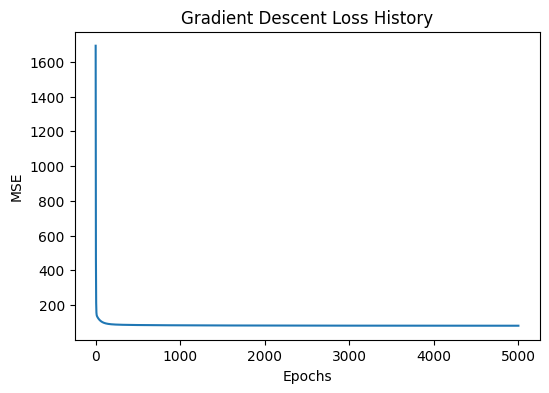

Training finished. Final MSE: 132.1258
Training finished. Final MSE: 108.1076
Training finished. Final MSE: 97.4069
Training finished. Final MSE: 88.8285
Training finished. Final MSE: 84.5570
Training finished. Final MSE: 83.3833
Training finished. Final MSE: 83.3844
Training finished. Final MSE: 81.4666
Training finished. Final MSE: 81.0675
Training finished. Final MSE: 82.0443
Training finished. Final MSE: 81.0068
Training finished. Final MSE: 80.9549

Hyperparameter Tuning Results:
    Learning Rate  Epochs         MSE        R2
6           0.050    1000   65.105784  0.589545
5           0.010    5000   65.106020  0.589544
9           0.100    1000   65.164548  0.589175
7           0.050    3000   65.452470  0.587359
4           0.010    3000   65.513088  0.586977
8           0.050    5000   65.991580  0.583961
10          0.100    3000   66.183884  0.582748
11          0.100    5000   66.555634  0.580405
3           0.010    1000   69.047782  0.564693
2           0.001    5000   76

In [7]:
#1.Read it using pandas.

#Importing required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLR
import matplotlib.pyplot as plt

#Reading Real Estate dataset
df = pd.read_csv("/content/Real estate.csv")
print(df.head()) #Printing first 5 rows to ensure data is printed correctly

##

#2.Check for null values.
print(df.isnull().sum()) #Checking missing values in cloumn

##

#3.For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
target_column = df.columns[-1] #Getting last column which is target variable
for col in df.columns[1:-1]: #Running loop to get all column values except first and last
    plt.figure(figsize=(6,4)) #Plotting them
    plt.scatter(df[col], df[target_column])
    plt.xlabel(col)
    plt.ylabel(target_column)
    plt.title(f"{col} vs {target_column}")
    plt.show()

##

#4.Remove the unwanted columns.
df = df.drop(df.columns[0], axis=1) #Removing unwanted columns which include first column
print(df.columns)

##

#5.Split the dataset into train and test data. Test data size = 25% of total dataset.
X = df.iloc[:, :-1].values #Selecting all columns except last which are features
y = df.iloc[:, -1].values #Target value which is last column
X_train, X_test, y_train, y_test = train_test_split( #Splitting data as training(75%) and testing (25%)
    X, y, test_size=0.25, random_state=42
)

##

#6. Normalize the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
scaler = MinMaxScaler() #Normalising data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##

#7.Fit the training data into the model created in question 1 and predict the testing data.
gd_model = LinearRegression(learning_rate=0.05, epochs=5000) #Training model using model used we created earlier
gd_model.fit(X_train_scaled, y_train)
y_pred_gd = gd_model.predict(X_test_scaled) #Predicting target values using it

##

#8.Use mean square error and R2 from sklearn.metrics as evaluation criterias.
mse_gd = mean_squared_error(y_test, y_pred_gd) #Getting mean squared error and Rsquare error
r2_gd = r2_score(y_test, y_pred_gd)
print("\nGradient Descent Model Evaluation:")
print("MSE:", mse_gd)
print("R^2:", r2_gd)

##

#9.Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R2.
#Now predicting output using inbuilt function
sk_model = SklearnLR()
sk_model.fit(X_train_scaled, y_train)
y_pred_sk = sk_model.predict(X_test_scaled)

mse_sk = mean_squared_error(y_test, y_pred_sk) #Mean square error and Rsquare error for it
r2_sk = r2_score(y_test, y_pred_sk)
print("\nSklearn LinearRegression Evaluation:")
print("MSE:", mse_sk)
print("R^2:", r2_sk)

#Plotting loss history
plt.figure(figsize=(6,4))
plt.plot(gd_model.loss_history)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Gradient Descent Loss History")
plt.show()

##

#10.Tune the hyperparameters of your models (learning rate, epochs) to achieve losses close to that of the sklearn models.
learning_rates = [0.001, 0.01, 0.05, 0.1] #Checking for different values of epochs and learning rates
epochs_list = [1000, 3000, 5000]

results = []

for lr in learning_rates:   #Gives best result for Learning Rate = 0.05 ,Epochs = 1000

    for ep in epochs_list:
        model = LinearRegression(learning_rate=lr, epochs=ep)
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)

        mse = mean_squared_error(y_test, preds)
        r2 = r2_score(y_test, preds)

        results.append([lr, ep, mse, r2])

tuning_df = pd.DataFrame(
    results, columns=["Learning Rate", "Epochs", "MSE", "R2"]
)

print("\nHyperparameter Tuning Results:")
print(tuning_df.sort_values(by="MSE"))

# Sample test results
comparison_results = pd.DataFrame({
    "Actual Price": y_test[:5],
    "Predicted (From Scratch)": y_pred_gd[:5],
    "Predicted (Sklearn)": y_pred_sk[:5]
})

print("\nSample Test Results:")
print(comparison_results)



# Logistic Regression
## Question 3

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module.
Here is an explanation of the breast cancer dataset's components:

* Features (X):

 * The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

* Target (y):

 * The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
    * 0: Represents a malignant (cancerous) tumor.
    * 1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."


1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.
5. Write code for the sigmoid function and Logistic regression.

def sigmoid(z):
   "..."

def sigmoid_derivative(z):
    "..."

class LogisticRegression:
    def __init__(self, learning_rate, epochs):
      #Initialise the hyperparameters of the model
        self.lr = "..."
        self.epochs = "..."

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = "..."
        self.bias = "..."

        #Implement the GD algortihm
        for _ in range(self.epochs):
            z = "..."
            y_pred = "..."

            dw = "..."
            db = "..."

            self.weights -= "..."
            self.bias -= "..."

    def predict(self, X):
      #Write the predict function
        "..."
        return y_pred

6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .
9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics


In [3]:
#1.Load the dataset from sklearn.datasets
#Importing libraries
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression as SklearnLogReg
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#Loading dataset
data = load_breast_cancer()

##

#2.Separate out the X and Y columns.
X = data.data          # Features
y = data.target        # Target

##

#3.Normalize the X data using MinMaxScaler or StandardScaler.
#Normalising X data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

##

#4.Create a train-test-split. Take any suitable test size.
#Splitting data as training(80%) and testing(20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

##

#5. Write code for the sigmoid function and Logistic regression.
#Writing sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Writing derivative of sigmoid
def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

#Logistic Regression model
class LogisticRegression:
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape #Getting number of features
        y = y.reshape(-1, 1) #Reshaping for matrix multiplication

        # Initialize parameters slopes and intercept
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias #Computing linear combination
            y_pred = sigmoid(z) #Calculating probability using sigmoid

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) #Computing gradients
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw #Changing weight and bias to reduce error
            self.bias -= self.lr * db

    def predict(self, X): #Testing model on unseen data
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return (y_pred >= 0.5).astype(int).flatten()

##

#6. Fit your model on the dataset and make predictions.
#Training our model
my_model = LogisticRegression(learning_rate=0.01, epochs=3000)
my_model.fit(X_train, y_train)

y_pred_my = my_model.predict(X_test) #Predicted output of unseen testing data
acc_my = accuracy_score(y_test, y_pred_my) #Calculating accuracy score

print("Logistic Regression Accuracy(From scratch):", acc_my)

##

#7.Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
#8.Print accuracy_score in each case using sklearn.metrics.
penalties = ["l2", "l1", "elasticnet", "none"] #List of penalties
sk_results = {}

for p in penalties: #Comparing for different penalties
    try:
        model = SklearnLogReg(
            penalty=p,
            solver="saga",
            max_iter=5000,
            l1_ratio=0.5 if p == "elasticnet" else None
        )
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        sk_results[p] = (model, acc)
        print(f"Sklearn Logistic Regression ({p}) Accuracy:", acc)
    except:
        pass

##

#9.For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
#Calculating best sklearn penalty
best_penalty = None
best_acc = -1

for p in sk_results:
    if sk_results[p][1] > best_acc:
        best_acc = sk_results[p][1]
        best_penalty = p
        best_sk_model = sk_results[best_penalty][0]


print("\nBest Sklearn Penalty:", best_penalty)


#Calculating classification reports
print("\n--- Classification Report (My Model) ---")
print(classification_report(y_test, y_pred_my))

print("\n--- Classification Report (Sklearn Model) ---")
print(classification_report(y_test, best_sk_model.predict(X_test)))

##

#10.For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics
#Calculating confusion matrices
print("\n--- Confusion Matrix (My Model) ---")
print(confusion_matrix(y_test, y_pred_my))

print("\n--- Confusion Matrix (Sklearn Model) ---")
print(confusion_matrix(y_test, best_sk_model.predict(X_test)))


Logistic Regression Accuracy(From scratch): 0.9473684210526315
Sklearn Logistic Regression (l2) Accuracy: 0.9824561403508771
Sklearn Logistic Regression (l1) Accuracy: 0.956140350877193
Sklearn Logistic Regression (elasticnet) Accuracy: 0.9824561403508771

Best Sklearn Penalty: l2

--- Classification Report (My Model) ---
              precision    recall  f1-score   support

           0       1.00      0.86      0.93        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114


--- Classification Report (Sklearn Model) ---
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0

# KNN
## Question 4

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)

7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)









In [4]:
#1.Load the data as you did in the 2nd question
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Loading datset
df = pd.read_csv("/content/glass.csv")
print(df.head(200)) #Printing first 200 entires

##

#2. Extract the X and Y columns.
# Removing ID column and separating features and target
X = df.iloc[:, 1:-1]     # Features
y = df.iloc[:, -1]       # Target (Glass Type)

# Convert pandas dataframe to numpy arrays
X = np.array(X)
y = np.array(y)

##

#3.Split it into training and testing datasets.
#Dividng data as testing(20%) and training(80%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

##

#4.Define Euclidean distance.
#Defining euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

##

#5.Build the KNN model.
#Building KNN model
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []

        for x in X_test: #Calculating k minimum distances
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
            k_indices = np.argsort(distances)[:self.k] #Sorting distances to get indices of k minimum distances
            k_labels = self.y_train[k_indices] #Storing k indices
            prediction = np.bincount(k_labels).argmax() #Picking most frequent class
            predictions.append(prediction)

        return np.array(predictions) #Returning all predictions

##

#6.Fit the model on the training data.
#Fitting model on training data
knn_custom = KNN(k=3)
knn_custom.fit(X_train, y_train)

##

#7.Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
#Calculating predicted outputs
y_pred_custom = knn_custom.predict(X_test)
accuracy_custom = accuracy_score(y_test, y_pred_custom) #Finding accuracy
print("Accuracy (for k=3):", accuracy_custom)

# Trying different values of k
print("\nAccuracy for different K values:")
for k in [1, 3, 5, 7]:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k}, Accuracy = {acc}")

##

#8.Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)
#Inbuilt sklearn model
sk_knn = KNeighborsClassifier(n_neighbors=3)
sk_knn.fit(X_train, y_train)

y_pred_sklearn = sk_knn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn) #Printing sklearn accuracy

print("\nAccuracy (Sklearn KNN, k=3):", accuracy_sklearn)

#Comparison Table
accuracy_table = pd.DataFrame({
    "Model": ["KNN (From Scratch)", "KNN (Sklearn)"],
    "Accuracy": [accuracy_custom, accuracy_sklearn]
})

print("\nAccuracy Comparison Table:")
print(accuracy_table)



          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.00     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.00     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.00     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.00     1
..       ...    ...   ...   ...    ...   ...   ...   ...   ...   ...
195  1.51545  14.14  0.00  2.68  73.39  0.08  9.07  0.61  0.05     7
196  1.51556  13.87  0.00  2.54  73.23  0.14  9.41  0.81  0.01     7
197  1.51727  14.70  0.00  2.34  73.28  0.00  8.95  0.66  0.00     7
198  1.51531  14.38  0.00  2.66  73.10  0.04  9.08  0.64  0.00     7
199  1.51609  15.01  0.00  2.51  73.05  0.05  8.83  0.53  0.00     7

[200 rows x 10 columns]
Accuracy (for k=3): 0.7441860465116279

Accuracy for different K values:
K = 1, Accuracy = 0.8372093023255814
K = 3, Accuracy = 0.7441860465116279
